In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from numpy.linalg import inv
import math

# Derivatives

### Question 1
Given f(x), f'(2.5) would repesent the magnitude of the slope of f(x) at x = 2.5

### Question 2
Given f(x, y), f'(2.5, y) would represnt the magnitude of the change in x, or the change along x's dimension, at x = 2.5

### Question 3
Given f(x), f''(2.5) would represent the rate of change of the slope at x = 2.5

### Question 4
Since grid search creates a matrix of all possible linear combinations of $\beta$'s, we can systematically check all combinations and test whether the derivative of the functions with the respective $\beta$ values = 0. Such $\beta$ combinations would represent minima and maxima.

### Question 5
We move in the negative direction because gradient descent is supposed to move towards a point of convergence within the error function. We need to penalize $\theta$ values that are not close to the minimum of the error.

### Question 6
A Hessian matrix is a square matrix of second order partial derivatives of a scalar-valued function.

### Question 7

Write a function to do a grid search to minimize the sum of squared error in a simple linear regression model. The function should be general enough to take in an arbitrary x (predictor/feature/independent) and y (response/dependent) as well as user specified ranges for slope and intercept values. Test your function on the cars.csv data set and the counties.csv data set using age75 (percent of county over the age of 75) as the predictor variable and republican (percent of county voting for republicans). Note that there are missing values that may need to be removed.

In [2]:
# function takes in x and y values as pandas series
def grid_search(slope_interval, intercept_interval, x, y):
    '''
    A grid search function that tests every combination of 
    possible intercept and slopes from a user provided interval
    of possible slope and intercept values. The slope and intercept
    combination with the smallest Sum of Squared Error is returned.
    
    @params slope_interval, intercept_interval: the lower and upper bound for the slope and intercept
    @params x, y: the feature vector and true output value vector
    @return: the slope and intercept with the smallest SSE
    '''
    slope = None
    intercept = None
    min_SSE = None
    intercept_sequence = np.linspace(intercept_interval[0], intercept_interval[1], 100)
    slope_sequence = np.linspace(slope_interval[0], slope_interval[1], 100)
    for beta_0 in intercept_sequence:
        for beta_1 in slope_sequence:
            y_hats = beta_0 + beta_1 * x
            SSE = sum((y - y_hats) ** 2)
            if min_SSE is None or SSE < min_SSE:
                min_SSE = SSE
                slope = beta_1
                intercept = beta_0
    print("SSE is: ", min_SSE)
    return slope, intercept

In [3]:
cars = pd.read_csv('cars.csv')
counties = pd.read_csv('counties.csv')

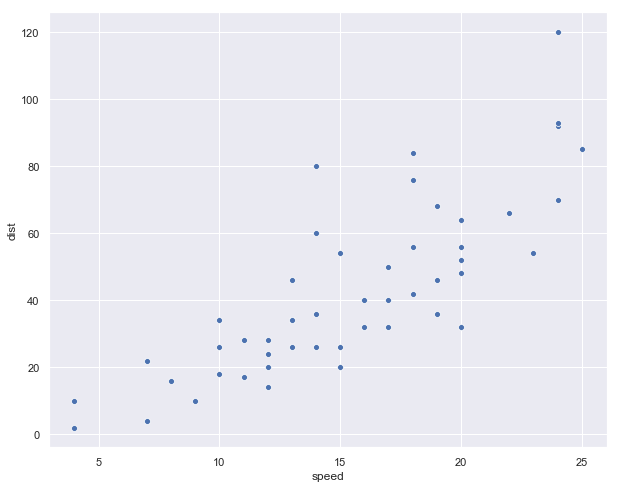

In [6]:
# Visualize cars data so we can select the interval for slope and intercept
sns.set(rc = {'figure.figsize': (10, 8)})
sns.scatterplot(x = 'speed', y = 'dist', data = cars)
plt.show()

In [7]:
slope_interval = (-20.0, 20.0)
intercept_interval = (-20.0, 20.0)

min_interval = grid_search(slope_interval, intercept_interval, cars['speed'], cars['dist'])
print("min slope: ", min_interval[0])
print("min intercept: ", min_interval[1])

SSE is:  11367.103662891543
min slope:  3.8383838383838373
min intercept:  -15.959595959595958


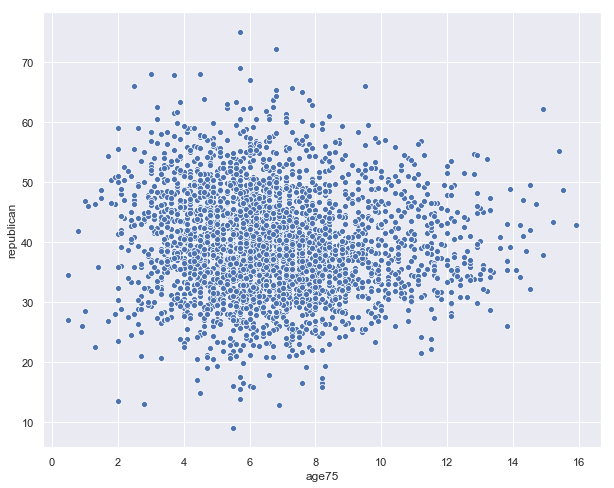

In [8]:
# Visualize county data so we can select the interval for slope and intercept
county_vars = counties.loc[:, ['age75', 'republican']].dropna()
sns.scatterplot(x = 'age75', y = 'republican', data = county_vars)
plt.show()

In [9]:
slope_interval = (-20.0, 20.0)
intercept_interval = (-20.0, 20.0)

min_interval = grid_search(slope_interval, intercept_interval, county_vars['age75'], county_vars['republican'])
print("min slope: ", min_interval[0])
print("min intercept: ", min_interval[1])

SSE is:  389844.02954070666
min slope:  2.6262626262626263
min intercept:  20.0


### Question 8

Write code to find the minimum SSE using gradient descent for the cars data set where the intercept is assumed known (following the pseudo code). Use an initial guess for beta_0 of 1, a delta in the derivative of 0.00001, an alpha (movement size) of 0.00001, and a tolerance of 0.0001.

In [11]:
x = cars['speed']
y = cars['dist']
beta_0 = -17.579
beta_1 = 1
delta = 0.00001
alpha = 0.00001
tolerance = 0.0001

y_hat = beta_0 + beta_1 * x
SSE = sum((y_hat - y) ** 2)

while True:
    temp_1 = beta_1 - alpha * ((sum((beta_0 + (beta_1 + delta) * x - y) ** 2) - 
                                sum((beta_0 + beta_1 * x - y) ** 2))/delta)
    beta_1 = temp_1
    
    prev_SSE = SSE
    
    y_hat = beta_0 + beta_1 * x
    SSE = sum((y_hat - y) ** 2)
    if abs(SSE - prev_SSE) <= tolerance:
        break

print("SSE is: ", SSE)
print("slope is: ", beta_1)
print("intercept is: ", beta_0)

SSE is:  11353.521158479753
slope is:  3.9323131551973347
intercept is:  -17.579


### Question 9

Write code to find the minimum SSE using gradient descent for the cars data set where intercept and slope are both unknown (following the pseudo code). Use an initial guess for beta_0 of -20 and beta_1 of 1, an alpha (movement size) of 0.00002, and a tolerance of 0.000001.

In [12]:
x = cars['speed']
y = cars['dist']
m = len(cars['speed'])
beta_0 = -20.0
beta_1 = 1.0
alpha = 0.00002
tolerance = 0.000001


y_hat = beta_0 + beta_1 * x
SSE = sum((y - y_hat) ** 2)

while True:
    temp_0 = beta_0 - alpha * 2 * sum(beta_0 + beta_1 * x - y)
    temp_1 = beta_1 - alpha * 2 * sum((beta_0 + beta_1 * x - y) * x)
    
    beta_0 = temp_0
    beta_1 = temp_1
    
    prev_SSE = SSE
    
    y_hat = beta_0 + beta_1 * x
    SSE = sum((y - y_hat) ** 2)
    if abs(SSE - prev_SSE) <= tolerance:
        break
    

print("SSE is: ", SSE)
print("slope is: ", beta_1)
print("intercept is: ", beta_0)

SSE is:  11353.523472377887
slope is:  3.9336679463500834
intercept is:  -17.600718306181975


### Question 10


10. Write a function to find the ordinary least squares solution using matrices. The function should allow the user to input the ‘response’ vector and the ‘design matrix’. Apply the code to both the cars data set and the counties data set to check that it works.

In [13]:
def ordinary_least_squares(X, y):
    '''
    A function used to calculate the Ordinary Least Squares coefficient values
    
    @params X: the input values matrix
    @params y: the actual output values
    @return: the OLS coefficients
    '''
    xtx_inv = inv(np.matmul(X.transpose(), X))
    xty = np.matmul(X.transpose(), y)
    return np.matmul(xtx_inv, xty)

In [14]:
# Test Cars dataset
X = pd.concat([pd.Series(np.ones(50)), pd.Series(cars['speed'])], axis = 1)
ordinary_least_squares(X, cars['dist'])

array([-17.57909489,   3.93240876])

# Integrals

### Question 1
$\int_{1}^{5} f(x)dx$ represents the area under the curve of $f(x)$ from x = 1 to x = 5

### Question 2
$\int_{2}^{4}\int_{1}^{5} f(x,y)dxdy$ represents the area bounded by $x\in[1, 5]$ and $y\in[2, 4]$ in f(x, y)

### Question 3
Write a function to approximate the area under the standard normal PDF using Riemann sums. The
function should allow the user to specify the lower and upper end points, and the number of rectangles
for the approximation.

In [42]:
def normal_pdf(mean, std, x):
    '''
    A function that returns the value of the normal distribution
    for a given mean, standard deviation, and x value
    
    @params mean, std: the mean and standard deviation of the normal distribution
    @params x: the x value 
    @return: normal_pdf(x)
    '''
    var = float(std) ** 2
    denominator = math.sqrt(2 * math.pi * var)
    numerator = math.exp((-(x - mean) ** 2)/(2 * var))
    return numerator/denominator


def standard_normal_riemann_sum(lower_bound, upper_bound, num_rectangles):
    '''
    A function that returns the standard riemann sum
    of a normal distribution for a given lower bound, 
    upper bound, and number of rectangles
    
    @params lower_bound, upper_bound: the bounds of the Riemann Sum to be calculated
    @params num_rectangles: the number of rectangles used to calculate the Riemann Sum
    '''
    delta = float((upper_bound - lower_bound)/num_rectangles)
    riemann_sum = 0
    curr = lower_bound + (delta/2)
    while curr < upper_bound:
        riemann_sum += curr * normal_pdf(0, 1, curr)
        curr += (delta/2)
    return riemann_sum/num_rectangles

print(standard_normal_riemann_sum(0, 1, 1000000))


0.3139432327485211


### Question 4
We need to know the function representing the probability density function (pdf) of the random variable. 

### Question 5
A PDF that is useful for modeling sample proportions is the beta distribution since it can only take in
values between 0 and 1. Suppose that Y has a Beta(4, 6) distribution with PDF given by

$\begin{equation}
f(y)=\cfrac{9!}{3!5!}y^{3}(1 - y)^{5}
\end{equation}$

Use Monte Carlo integration to approximate $P(Y > 0.75)$

In [52]:
def delta_pdf(y):
    '''
    function that returns f(y) (the Beta(4, 6) distibution)
    
    @params: y, the inputs to f(y)
    @return: value of f(y)
    '''    
    return 504 * (y ** 3) * ((1 - y) ** 5)

x_vals = np.random.uniform(0.75, 1, 10000)
monte_carlo_sum = 0
for x in x_vals:
    monte_carlo_sum += delta_pdf(x)
monte_carlo_sum *= ((1 - 0.75)/len(x_vals))
print(monte_carlo_sum)

0.010077213070688883


### Question 6
Use Monte Carlo integration to approximate

$\begin{equation}
\int\int_{\Omega}sin\sqrt{ln(x+y+1)}dxdy,\Omega=\{(x,y):(x-1/2)^{2}+(y-1/2)^{2}\leq1/4\}
\end{equation}$

In [70]:
def f_x_y(x, y):
    '''
    function that returns f(x,y) 
    
    @params: x, y, the inputs to f(x, y)
    @return: value of f(x,y)
    '''
    return math.sin(math.sqrt(math.log(x + y + 1)))

# Omega represents a circle of radius 0.5 centered around the point (0.5, 0.5)
x_vals = []
y_vals = []
num_vals = 0

while num_vals < 10000:
    x_val = np.asscalar(np.random.rand(1,1))
    y_val = np.asscalar(np.random.rand(1,1))
    if (x_val - 0.5) ** 2 + (y_val - 0.5) ** 2 <= 0.25:
        x_vals.append(x_val)
        y_vals.append(y_val)
        num_vals += 1
monte_carlo_sum = 0
for i in range(num_vals):
    monte_carlo_sum += f_x_y(x_vals[i], y_vals[i])
monte_carlo_sum *= (1/num_vals)
print(monte_carlo_sum)

0.7240983068180479


### Question 7
Find a Monte Carlo approximation to question 5 by sampling directly from the indicated Beta
distribution.

In [74]:
x_vals = beta.pdf(np.random.uniform(0.75, 1, 100), 4, 6)
monte_carlo_sum = 0
for x in x_vals:
    monte_carlo_sum += delta_pdf(x)
monte_carlo_sum *= ((1 - 0.75)/len(x_vals))
print(monte_carlo_sum)

0.04169492380250801
